In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

import lightgbm as lgb

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

### データ読込

In [2]:
path = os.getcwd() + "/"

In [3]:
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [4]:
display(train.head(1))
display(train.tail(1))
display(train.shape)
display(train.dtypes)

display(train.describe())
display(train.describe(exclude="number"))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


(1460, 81)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
display(test.head(1))
display(test.tail(1))
display(test.shape)
display(test.dtypes)

display(test.describe())
display(test.describe(exclude="number"))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


(1459, 80)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


### 特徴量選択 1 欠損値を含まない数値データを特徴量とする

In [6]:
# 欠損値がなく、objectデータを除くカラムを抽出
features_1 = list(train[train.isnull().sum()[train.isnull().sum()==0].index].select_dtypes(exclude=object).columns)

In [7]:
# trainデータ
train_1 = train[features_1]

# testデータ
# testデータはSalePriceを含まないので削除
features_1.remove("SalePrice")
test_1 = test[features_1]

#### 学習

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_1.drop("SalePrice", axis=1), train_1["SalePrice"], test_size=0.3, random_state=42)

params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 42,
    'learning_rate': 0.1,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75
}

In [9]:
train_set = lgb.Dataset(X_train, y_train)
val_set = lgb.Dataset(X_test, y_test)

model_lgb = lgb.train(params,
                      train_set,
                      num_boost_round = 2500,
                      early_stopping_rounds = 50,
                      valid_sets = [train_set, val_set],
                      verbose_eval = 100)

y_pred = model_lgb.predict(X_test)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 17116.9	valid_1's rmse: 26860
Early stopping, best iteration is:
[99]	training's rmse: 17185.2	valid_1's rmse: 26796.5


### 誤差率

In [10]:
# MSE
from sklearn.metrics import mean_squared_error

mse_1 = mean_squared_error(y_test, y_pred)
print(f"MSE :{mse_1}")

# MAE
from sklearn.metrics import mean_absolute_error

mae_1 = mean_absolute_error(y_test, y_pred)
print(f"MAE :{mae_1}")

# 決定係数
from sklearn.metrics import r2_score

r2_1 = r2_score(y_test, y_pred)
print(f"決定係数 :{r2_1}")

# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error

rmse_1 = np.sqrt(mean_squared_error(y_pred, y_test))
print(f"RMSE :{rmse_1}")

MSE :718051766.5529627
MAE :16540.0487430681
決定係数 :0.8970991518382367
RMSE :26796.48795183732


### 特徴量選択 2  欠損値を削除した数値データを特徴量とする

#### 欠損値を削除

In [11]:
# 欠損値の割合
train_miss_ratio = pd.DataFrame(train.isnull().sum()[train.isnull().sum() != 0]/train.isnull().count()[train.isnull().sum() != 0]*100, columns=["train_miss_ratio"])

test_miss_ratio = pd.DataFrame(test.isnull().sum()[test.isnull().sum() != 0]/test.isnull().count()[test.isnull().sum() != 0]*100, columns=["test_miss_ratio"])

In [12]:
# trainデータとtestデータで比較
pd.concat([train_miss_ratio, test_miss_ratio], axis=1)

,train_miss_ratio,test_miss_ratio
LotFrontage,17.739726,15.558602
Alley,93.767123,92.666210
MasVnrType,0.547945,1.096642
MasVnrArea,0.547945,1.028101
BsmtQual,2.534247,3.015764
BsmtCond,2.534247,3.084304
BsmtExposure,2.602740,3.015764
BsmtFinType1,2.534247,2.878684
BsmtFinType2,2.602740,2.878684
Electrical,0.068493,NaN


In [13]:
# trainデータ 数値データのカラムのみを対象とし、欠損値の割合が2割以下の項目は欠損値削除

features_2 = list(train.select_dtypes(exclude=object).isnull().sum()[train.isnull().sum()/train.isnull().count()<=0.2].index)

In [14]:
# 特徴量の選択
train_2 = train[features_2]

features_2.remove("SalePrice")
test_2 = train[features_2]

In [15]:
# trainデータ 欠損値の削除
train_2.dropna(inplace=True)

In [16]:
# testデータ 欠損値の割合が2割以下の項目は欠損値を埋める
test_2.fillna(test_2.median(), inplace=True)

#### 学習

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_2.drop("SalePrice", axis=1), train_2["SalePrice"], test_size=0.3, random_state=42)

params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 42,
    'learning_rate': 0.1,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75
}

In [18]:
train_set = lgb.Dataset(X_train, y_train)
val_set = lgb.Dataset(X_test, y_test)

model_lgb = lgb.train(params,
                      train_set,
                      num_boost_round = 2500,
                      early_stopping_rounds = 50,
                      valid_sets = [train_set, val_set],
                      verbose_eval = 100)

y_pred = model_lgb.predict(X_test)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 17712.9	valid_1's rmse: 32494
Early stopping, best iteration is:
[98]	training's rmse: 17833.4	valid_1's rmse: 32416.5


### 誤差率

In [19]:
# MSE
from sklearn.metrics import mean_squared_error

mse_2 = mean_squared_error(y_test, y_pred)
print(f"MSE :{mse_2}")

# MAE
from sklearn.metrics import mean_absolute_error

mae_2 = mean_absolute_error(y_test, y_pred)
print(f"MAE :{mae_2}")

# 決定係数
from sklearn.metrics import r2_score

r2_2 = r2_score(y_test, y_pred)
print(f"決定係数 :{r2_2}")

# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error

rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE :{rmse_2}")

MSE :1050826489.8539871
MAE :19378.48196261921
決定係数 :0.8685064360941711
RMSE :32416.45399876407


### 特徴量選択3 ラベルエンコーディングしてobjectデータも対象にする

### 欠損値処理

In [20]:
cat_list = list(train.select_dtypes(include=object).isnull().sum()[train.select_dtypes(include=object).isnull().sum() > 0].index)

In [21]:
train3 = train
test3  = test

In [22]:
for i in cat_list:
    train3[i].fillna("missing", inplace=True)
    
for i in cat_list:
    test3[i].fillna("missing", inplace=True)   

In [23]:
encorder = preprocessing.LabelEncoder()

In [24]:
for i in cat_list:
    train3[i] = encorder.fit_transform(train3[i])
    test3[i] = encorder.fit_transform(test3[i])

In [25]:
# 欠損値の割合が2割超の項目は対象外とする

features_3 = list(train3.select_dtypes(exclude=object).isnull().sum()[train3.isnull().sum()/train3.isnull().count()<=0.2].index)

In [26]:
# 特徴量の選択
train_3 = train[features_3]

features_3.remove("SalePrice")
test_3 = train[features_3]

### 学習

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_2.drop("SalePrice", axis=1), train_2["SalePrice"], test_size=0.3, random_state=42)

params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 42,
    'learning_rate': 0.1,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75
}

In [28]:
train_set = lgb.Dataset(X_train, y_train)
val_set = lgb.Dataset(X_test, y_test)

model_lgb = lgb.train(params,
                      train_set,
                      num_boost_round = 2500,
                      early_stopping_rounds = 50,
                      valid_sets = [train_set, val_set],
                      verbose_eval = 100)

y_pred = model_lgb.predict(X_test)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 17712.9	valid_1's rmse: 32494
Early stopping, best iteration is:
[98]	training's rmse: 17833.4	valid_1's rmse: 32416.5


### 誤差率

In [29]:
# MSE
from sklearn.metrics import mean_squared_error

mse_3 = mean_squared_error(y_test, y_pred)
print(f"MSE :{mse_3}")

# MAE
from sklearn.metrics import mean_absolute_error

mae_3 = mean_absolute_error(y_test, y_pred)
print(f"MAE :{mae_3}")

# 決定係数
from sklearn.metrics import r2_score

r2_3 = r2_score(y_test, y_pred)
print(f"決定係数 :{r2_3}")

# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error

rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE :{rmse_3}")

MSE :1050826489.8539871
MAE :19378.48196261921
決定係数 :0.8685064360941711
RMSE :32416.45399876407


### 特徴量選択4 外れ値を処理する

In [30]:
num_list = list(train.select_dtypes(exclude=object).columns)

In [31]:
len(num_list)

54

In [44]:
num_list

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### 1～5

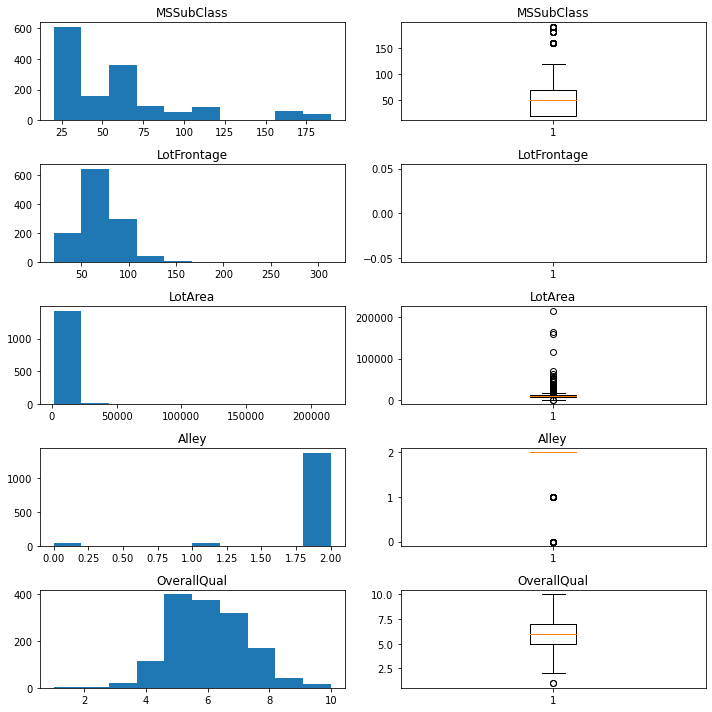

In [41]:
fig = plt.figure(figsize=(10,10))

for i in range(1, 6):
    plt.subplot(5, 2, i*2-1)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 6～10

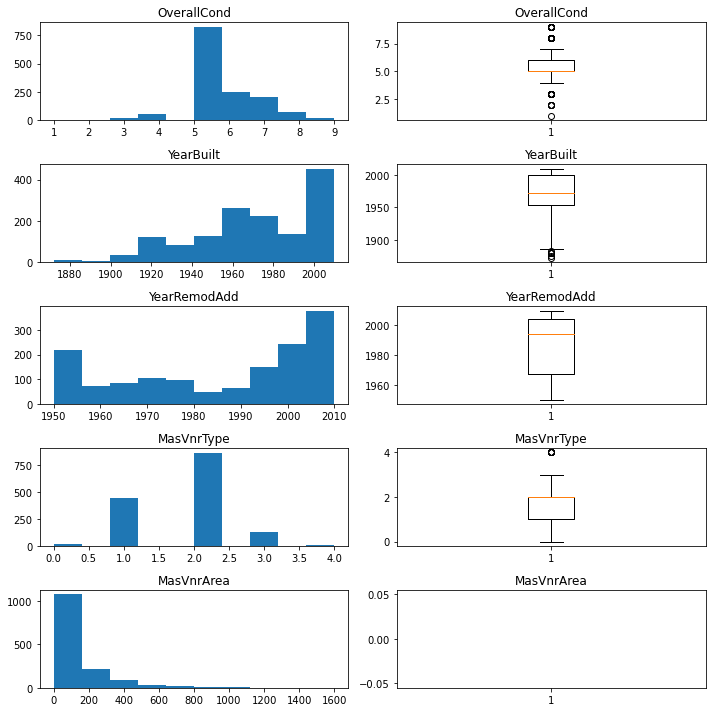

In [75]:
fig = plt.figure(figsize=(10,10))

for i in range(6, 11):
    plt.subplot(5, 2, i*2-11)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-10)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 11～15

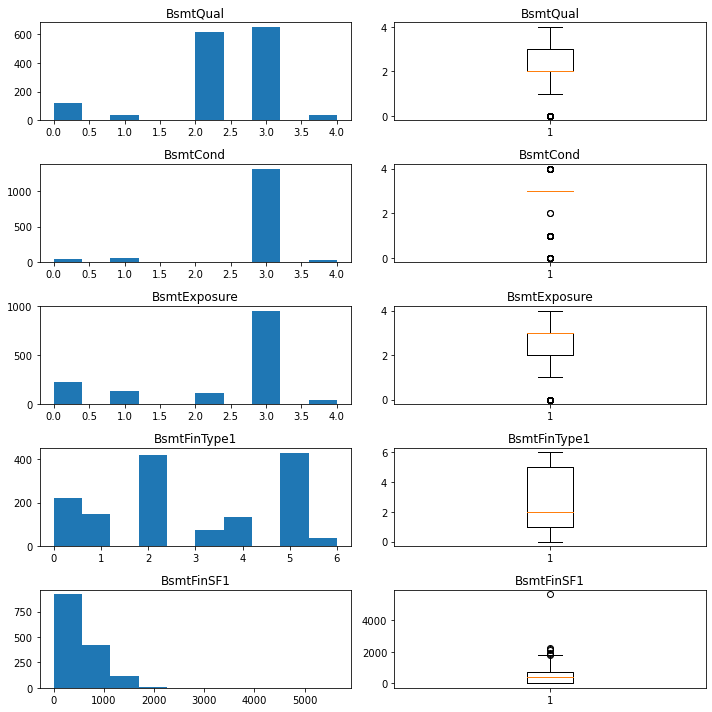

In [95]:
fig = plt.figure(figsize=(10,10))

for i in range(11, 16):
    plt.subplot(5, 2, i*2-21)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-20)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 16～20

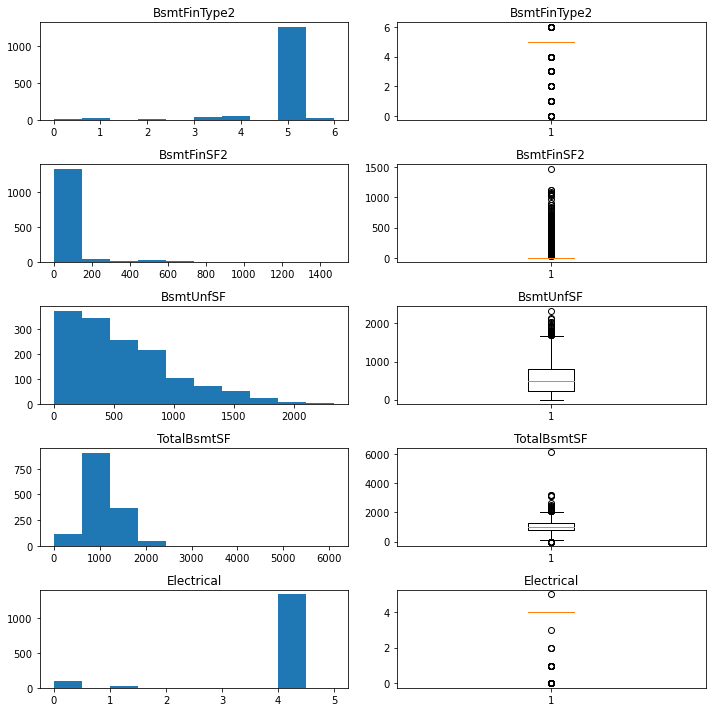

In [47]:
fig = plt.figure(figsize=(10,10))

for i in range(16, 21):
    plt.subplot(5, 2, i*2-31)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-30)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 21～25

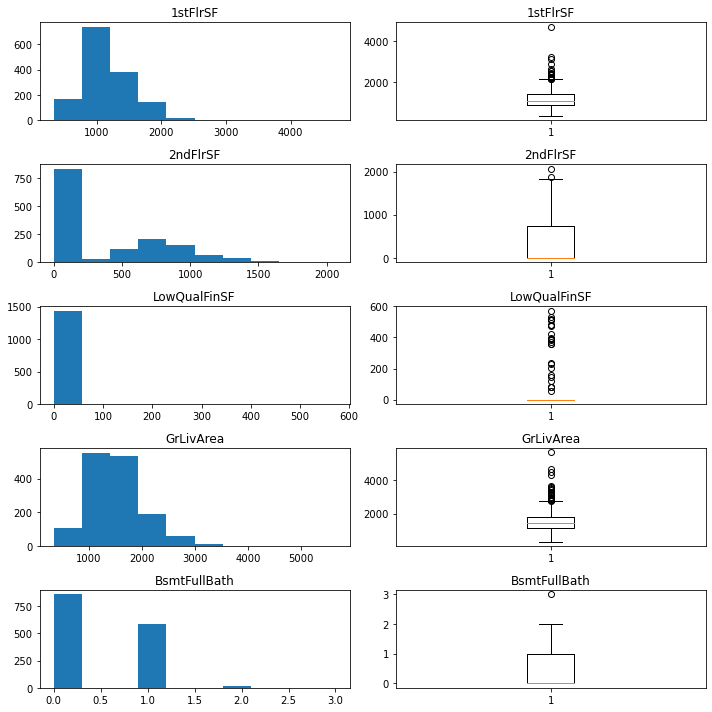

In [48]:
fig = plt.figure(figsize=(10,10))

for i in range(21, 26):
    plt.subplot(5, 2, i*2-41)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-40)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 26～30

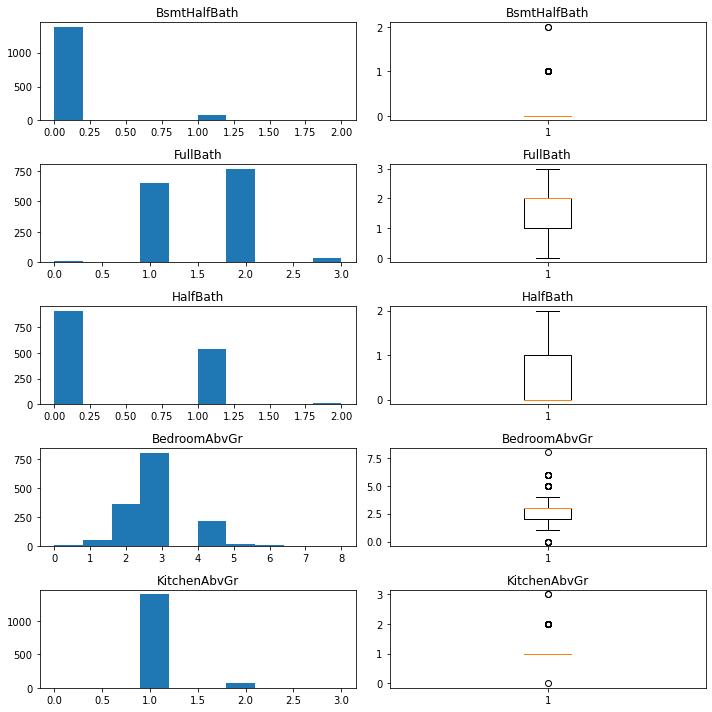

In [49]:
fig = plt.figure(figsize=(10,10))

for i in range(26, 31):
    plt.subplot(5, 2, i*2-51)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-50)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 31～35

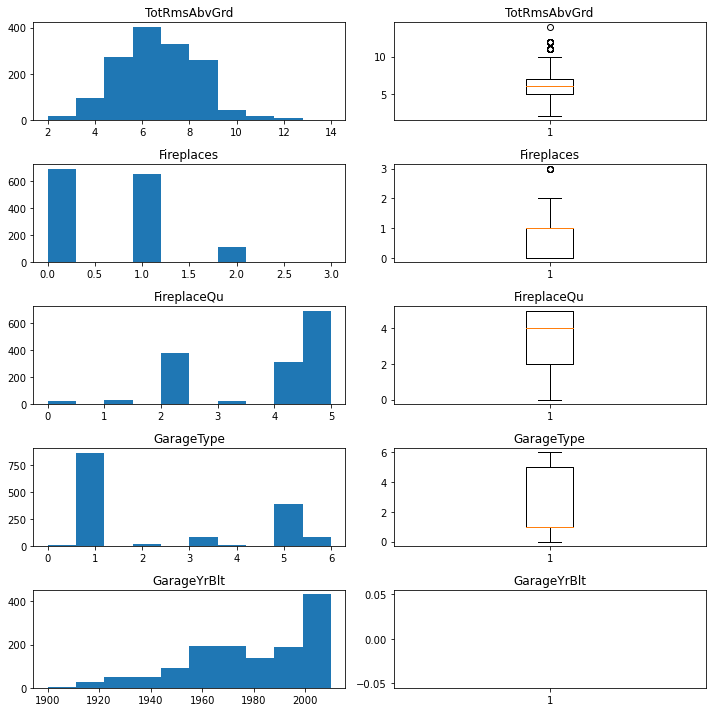

In [50]:
fig = plt.figure(figsize=(10,10))

for i in range(31, 36):
    plt.subplot(5, 2, i*2-61)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-60)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 36～40

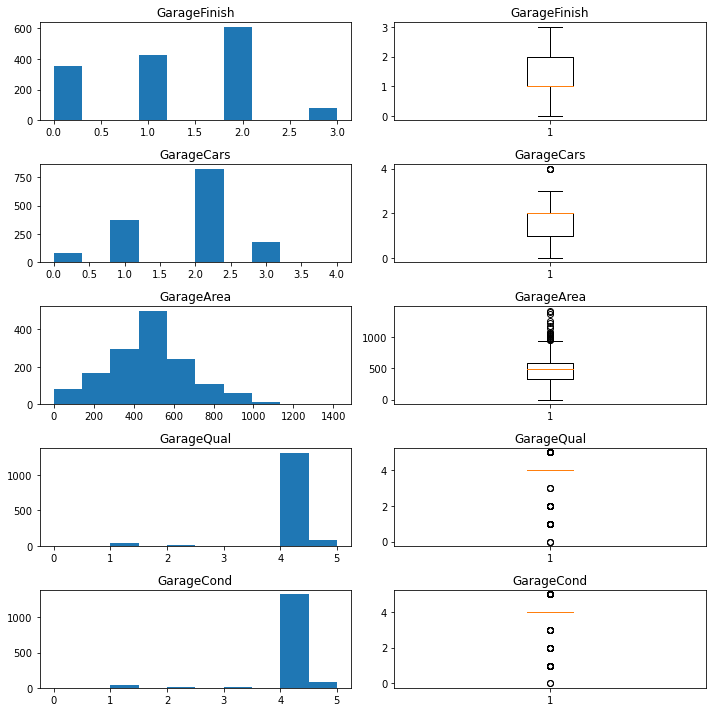

In [51]:
fig = plt.figure(figsize=(10,10))

for i in range(36, 41):
    plt.subplot(5, 2, i*2-71)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-70)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 41～45

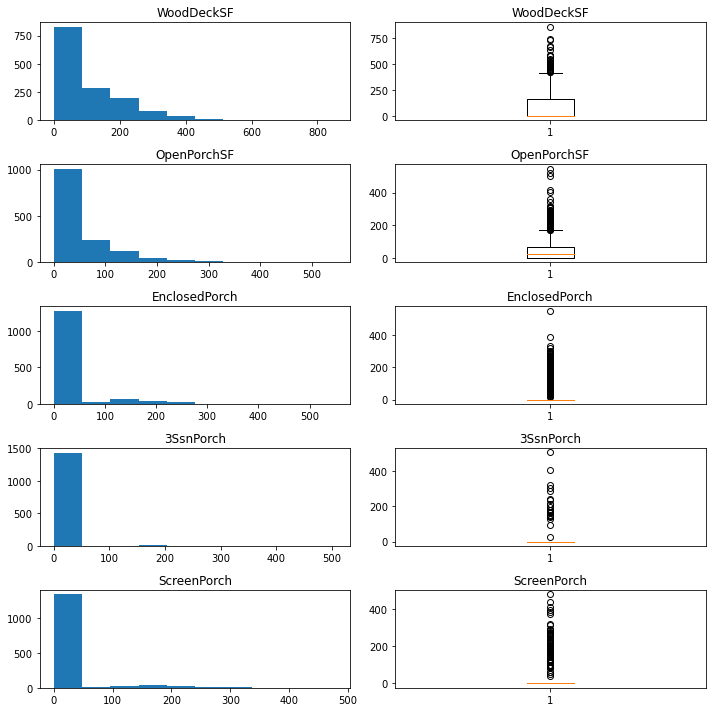

In [52]:
fig = plt.figure(figsize=(10,10))

for i in range(41, 46):
    plt.subplot(5, 2, i*2-81)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-80)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 46～50

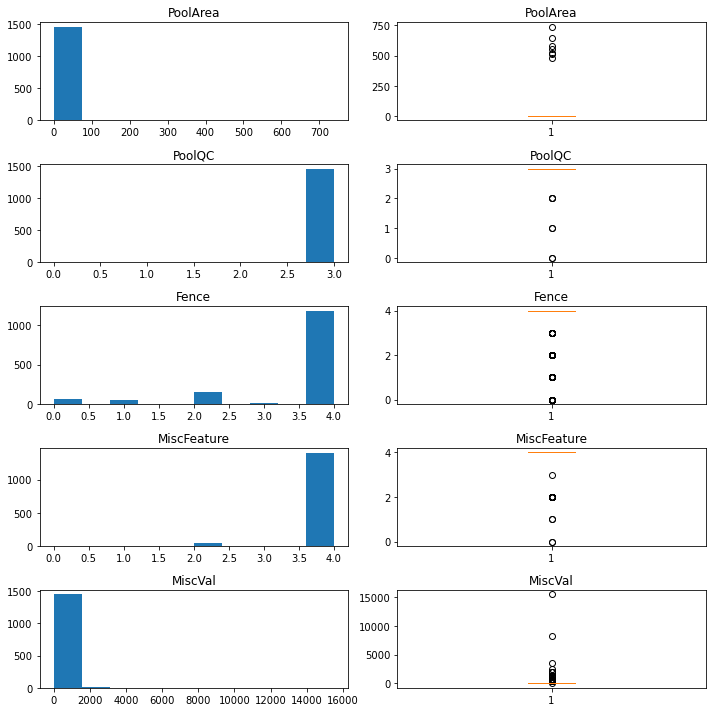

In [53]:
fig = plt.figure(figsize=(10,10))

for i in range(46, 51):
    plt.subplot(5, 2, i*2-91)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-90)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 51～53

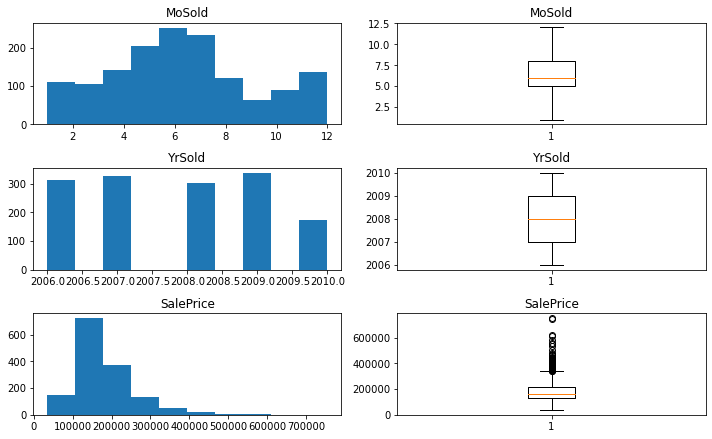

In [55]:
fig = plt.figure(figsize=(10,10))

for i in range(51, 54):
    plt.subplot(5, 2, i*2-101)
    plt.title(num_list[i])
    plt.hist(train[num_list[i]])
    plt.subplot(5, 2, i*2-100)
    plt.title(num_list[i])
    plt.boxplot(train[num_list[i]])

plt.tight_layout()

### 外れ値がある項目を集約

In [114]:
pickup_list = [
    'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
]

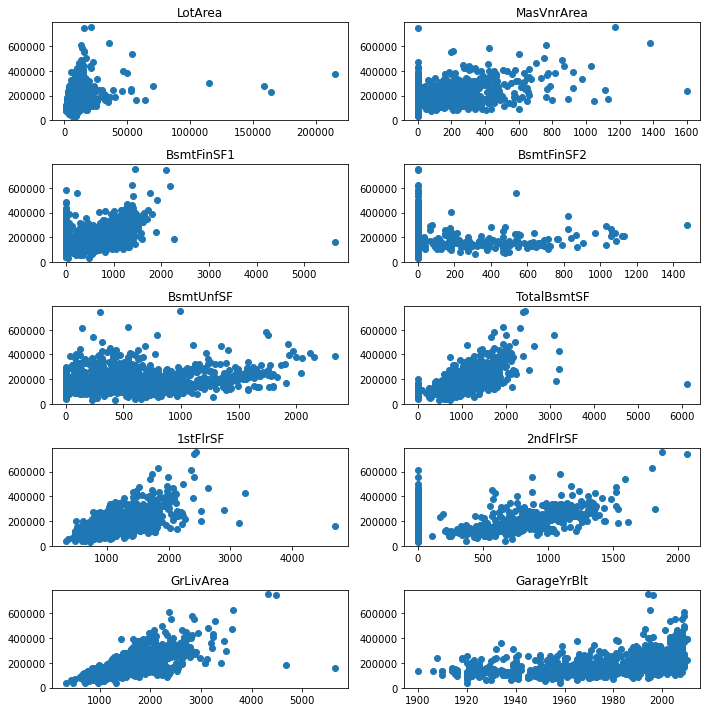

In [118]:
fig = plt.figure(figsize=(10,10))

for i in range(0, 10):
    plt.subplot(5, 2, i+1)
    plt.title(pickup_list[i])
    plt.scatter(train[pickup_list[i]], train['SalePrice'])

plt.tight_layout()

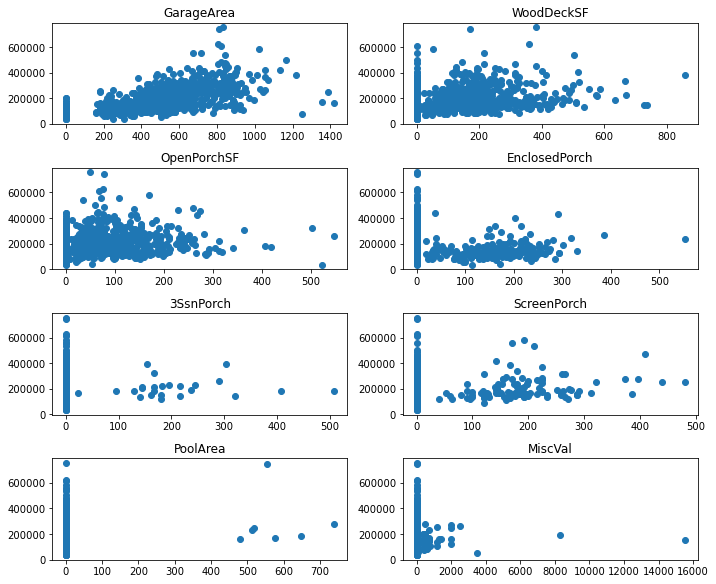

In [121]:
fig = plt.figure(figsize=(10,10))

for i in range(10, 18):
    plt.subplot(5, 2, i-9)
    plt.title(pickup_list[i])
    plt.scatter(train[pickup_list[i]], train['SalePrice'])

plt.tight_layout()

### 外れ値の削除

In [153]:
train4 = train

### LotArea

In [158]:
train4 = train4.drop(train4[(train4['LotArea']<30000) & (train4['SalePrice']>600000)].index)

In [159]:
train4 = train4.drop(train4[train4['LotArea']>100000].index)

### MasVnrArea

In [174]:
train4 = train4.drop(train4[(train4["MasVnrArea"] == 0) & (train4["SalePrice"] > 600000)].index)

In [176]:
train4 = train4.drop(train4[train4["MasVnrArea"] > 1128].index)

### BsmtFinSF1

In [180]:
train4 = train4.drop(train4[train4['BsmtFinSF1']>5000].index)

In [183]:
train4 = train4.drop(train4[train4["BsmtFinSF1"]>600000].index)

### BsmtFinSF2

In [187]:
train4 = train4.drop(train4[train4['BsmtFinSF2']>1200].index)

In [192]:
train4 = train4.drop(train4[(train4['BsmtFinSF2']>500)& (train4['SalePrice']>500000)].index)

### BsmtUnfSF

In [202]:
train4 = train4.drop(train4[train4["BsmtUnfSF"]>2300].index)

### TotalBsmtSF

In [206]:
train4 = train4.drop(train4[train4["TotalBsmtSF"]>6000].index)

### 1stFlrSF

In [209]:
train4 = train4.drop(train4[train4["1stFlrSF"]>4000].index)

In [213]:
train4 = train4.drop(train4[(train4["1stFlrSF"]>3000)&(train4["SalePrice"]<220000)].index)

### 2ndFlrSF

In [215]:
train4 = train4.drop(train4[train4["2ndFlrSF"]>1700].index)

In [217]:
train4 = train4.drop(train4[(train4["2ndFlrSF"]>700)&(train4["2ndFlrSF"]<1400)&(train4["SalePrice"]>500000)].index)

### GrLivArea

In [219]:
train4 = train4.drop(train4[train4["GrLivArea"]>4000].index)

In [222]:
train4 = train4.drop(train4[(train4["GrLivArea"]<1500)&(train4["SalePrice"]>350000)].index)

### GarageYrBlt

In [225]:
train4 = train4.drop(train4[(train4["GarageYrBlt"]<2000)&(train4["SalePrice"]>500000)].index)

### GarageArea

In [229]:
train4 = train4.drop(train4[(train4["GarageArea"]>1200)&(train4["SalePrice"]<350000)].index)

### WoodDeckSF

In [232]:
train4 = train4.drop(train4[train4["WoodDeckSF"]>720].index)

In [237]:
train4 = train4.drop(train4[(train4["WoodDeckSF"]>10)&(train4["WoodDeckSF"]<600)&(train4["SalePrice"]>550000)].index)

### OpenPorchSF

In [127]:
pickup_list

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

### 精度評価指標まとめ

In [38]:
print("特徴量選択 1 欠損値を含まない数値データを特徴量とする")
print(f"MSE :{mse_1}")
print(f"MAE :{mae_1}")
print(f"決定係数 :{r2_1}")
print(f"RMSE :{rmse_1}")

print()

print("特徴量選択 2 欠損値を削除した数値データを特徴量とする")
print(f"MSE :{mse_2}")
print(f"MAE :{mae_2}")
print(f"決定係数 :{r2_2}")
print(f"RMSE :{rmse_2}")

print()

print("特徴量選択3 ラベルエンコーディングしてobjectデータも対象にする")
print(f"MSE :{mse_3}")
print(f"MAE :{mae_3}")
print(f"決定係数 :{r2_3}")
print(f"RMSE :{rmse_3}")

特徴量選択 1 欠損値を含まない数値データを特徴量とする
MSE :718051766.5529627
MAE :16540.0487430681
決定係数 :0.8970991518382367
RMSE :26796.48795183732

特徴量選択 2 欠損値を削除した数値データを特徴量とする
MSE :1050826489.8539871
MAE :19378.48196261921
決定係数 :0.8685064360941711
RMSE :32416.45399876407

特徴量選択3 ラベルエンコーディングしてobjectデータも対象にする
MSE :1050826489.8539871
MAE :19378.48196261921
決定係数 :0.8685064360941711
RMSE :32416.45399876407
